# 0. 모듈 불러오기

In [1]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os 
os.chdir('/content/drive/MyDrive/프로젝트/데이콘')

# 📰 1. '개발자 모시기'의 등장

채용시장에서 '개발자 모시기' 라는 용어가 생길 정도로 개발자에 대한 기업의 수요가 증가하고 있습니다. 
 
> 그렇다면, **`개발자`**는 어떤 기준으로 기업을 선택하고 **`채용 시장`**에선 어떤 개발자들을 원하고 있는 걸까요? 

In [ ]:
Image.open("Image/개발자모시기.png").resize((400,350))

# ⭐ 2. 프로젝트의 목적 

>**1) 전반적인 개발자 채용 트렌드에 대해 알아본다.** <br>
>**2) 구직자인 개발자와 채용자인 기업의 특성을 각각 분석하여 비교한다.** <br>
>**3) 이를 통해, 개발자를 위한 채용 트렌드와 기업 트렌드를 제공한다.**


저희는 분석을 진행하기 앞서, 용어에 대한 정의를 내렸습니다.

### 2.1 개발자란? 
저희는 다음과 같이 정의했습니다. 
> 개발언어를 사용하여 업무를 수행하는 사람들’ 

### 2.2 채용트렌드란? 
저희는 다음과 같이 정의했습니다. 
> '기존과 다른 새로운 방향으로 채용이 변화해가는 경향이나 추세' 

### 2.3 기업트렌드란? 
저희는 다음과 같이 정의했습니다. 
> '구직자가 회사를 선택하는 다양한 기준' 



# 🌊 3. 채용트렌드를 알아보자

- 사용 데이터 
  - 네이버 뉴스 기사 제목 크롤링 
- 수집 방법 
  - '개발자 채용' 키워드 기준
  - 연도 별 수집 
    - 2020.12.24~2021.12.24 기준 5000개
    - 2019.12.24~2020.12.24 기준 5000개



In [ ]:
# image = cv2.imread("Image/news.png", cv2.IMREAD_ANYCOLOR)
# image = cv2.resize(image,dsize=(800,400))
# cv2_imshow(image)

## 3.1 Top 50 키워드

In [ ]:
df_20 = pd.read_csv('./FinalData/df_20.csv')
df_21 = pd.read_csv('./FinalData/df_21.csv')

data_2020 =go.Bar(
x = df_20['word'], y = df_20['count'],
    name="2020년",
    # opacity=0.9,
    marker={'color':'rgb(179,205,227)', 'line':{'color':'White','width':1}}
    )

data_2021 =go.Bar(
x = df_21['word'], y = df_21['count'],
    name="2021년",
    # opacity=0.9,
    marker={'color':'rgb(251,180,174)', 'line':{'color':'White','width':1}}
    )
cnt_data = [data_2020, data_2021]
layout = go.Layout(
    title = '<b>개발자 채용 관련 뉴스 키워드 TOP 50</b>',
    xaxis = {'title':'키워드'},
    yaxis = {'title':'Count'},
    )

fig = go.Figure(data=cnt_data, layout=layout)
fig.show()


**[Top 5 해석]**

⇒ 2020년에는 코로나로 인해, 취업 시장이 얼어붙으면서 신입 채용보다 경력 채용이 선호되는 현상을 보인 것으로 유추된다. (2020년 12위 : 코로나)

⇒ 하지만, 2021년에는 코로나 키워드의 순위가 50위권을 벗어나면서 채용 시장에서 코로나의 영향력이 줄어든 것으로 예상된다. 또한, **신입 키워드가 경력 키워드보다 우위에 있으면서, 개발자 채용 시장에서 신입 채용이 지난해보다 활발해진 것으로 예상**된다.

<br>

**[기업 종류 해석]**

⇒ 2020년 취업시장에서 활발한 활동을 보인 기업은 카카오였지만, 2021년 취업시장에서는 네이버의 활약이 더 돋보인다. 

⇒ 2020년 취업시장에서는 2021년에 비해 다양한 기업들이 순위권에 이름을 올렸다. 특히, IT기업들의 이름이 대부분이었다. 

⇒ 꾸준한 취업 공세를 보이는 기업은 **네이버, 카카오, 토스**로 볼 수 있다.

<br>

**[산업 종류 해석]**

⇒  2020년 가장 핫했던 개발 직군은 **AI**였던 것으로 보인다. 그 뒤로 게임, SW 개발자를 원하는 것을 알 수 있었다. 하지만, 2021년은 AI직군의 인기는 조금은 내려간 것으로 보인다. 

⇒ 2021년 핫한 개발직군은 **커머스, 플랫폼, 메타버스**인 것으로 보인다.

## 3.2 키워드 종류

In [ ]:
fig = make_subplots(rows = 1, cols = 2,
                    specs = [[{'type' : 'pie'}, 
                              {'type' : 'pie'}]],
                    subplot_titles=("2020년", "2021년"))

fig.add_trace (go.Pie(labels = df_20['type'], values = df_20['count']),
               row = 1,  col = 1)
fig.add_trace (go.Pie(labels = df_21['type'], values = df_21['count']),
               row = 1,  col = 2)

fig.update_traces(marker = dict(line=dict(color='white', width=2)))

fig.update_layout(title = '<b>개발자 채용 관련 뉴스 키워드 종류</b>')
fig.show()

**[키워드 해석]**

⇒ TOP 50에서 키워드 성격 별 비율을 보았을 때, 

2020년 대비 2021년의 **채용 관련 키워드의 비율이 가장 크게 증가한 것**을 알 수 있다. 

특히, 해당 성격을 가진 키워드에는 ‘경쟁’, ‘전쟁’, ‘확보’ 등의 키워드가 포함되어 기업에서 개발자 영입에 열을 올리고 있음을 알 수 있다. 또한 ‘연봉’, ‘스톡옵션’ 의 키워드를 통해 **‘개발자 모셔오기’**가 이루어지고 있는 채용 시장의 모습을 확인할 수 있었다. 

또한, 2021년에 새롭게 교육 키워드가 출현하면서 **개발자 양성을 위한 취업 교육 시스템들이 증가**하고 있는 것을 확인할 수 있다.  


# 💻 4. 개발자(구직자)는 어떤 특성을 가지고 있을까?

- 방법 : Stack Overflow 데이터 사용 
- 연도 별 빈도수 기준
    
    네이버 뉴스 채널에서 ‘개발자 채용’ 키워드를 기준으로 검색했을 때, 나온 뉴스 기사 제목들을 다음과 같이 기준을 나눠 크롤링하였습니다. 
    
    - 2020.12.24~2021.12.24 기준 5000개
    - 2019.12.24~2020.12.24 기준 5000개


## 4.1 개발자의 직장 선택 기준

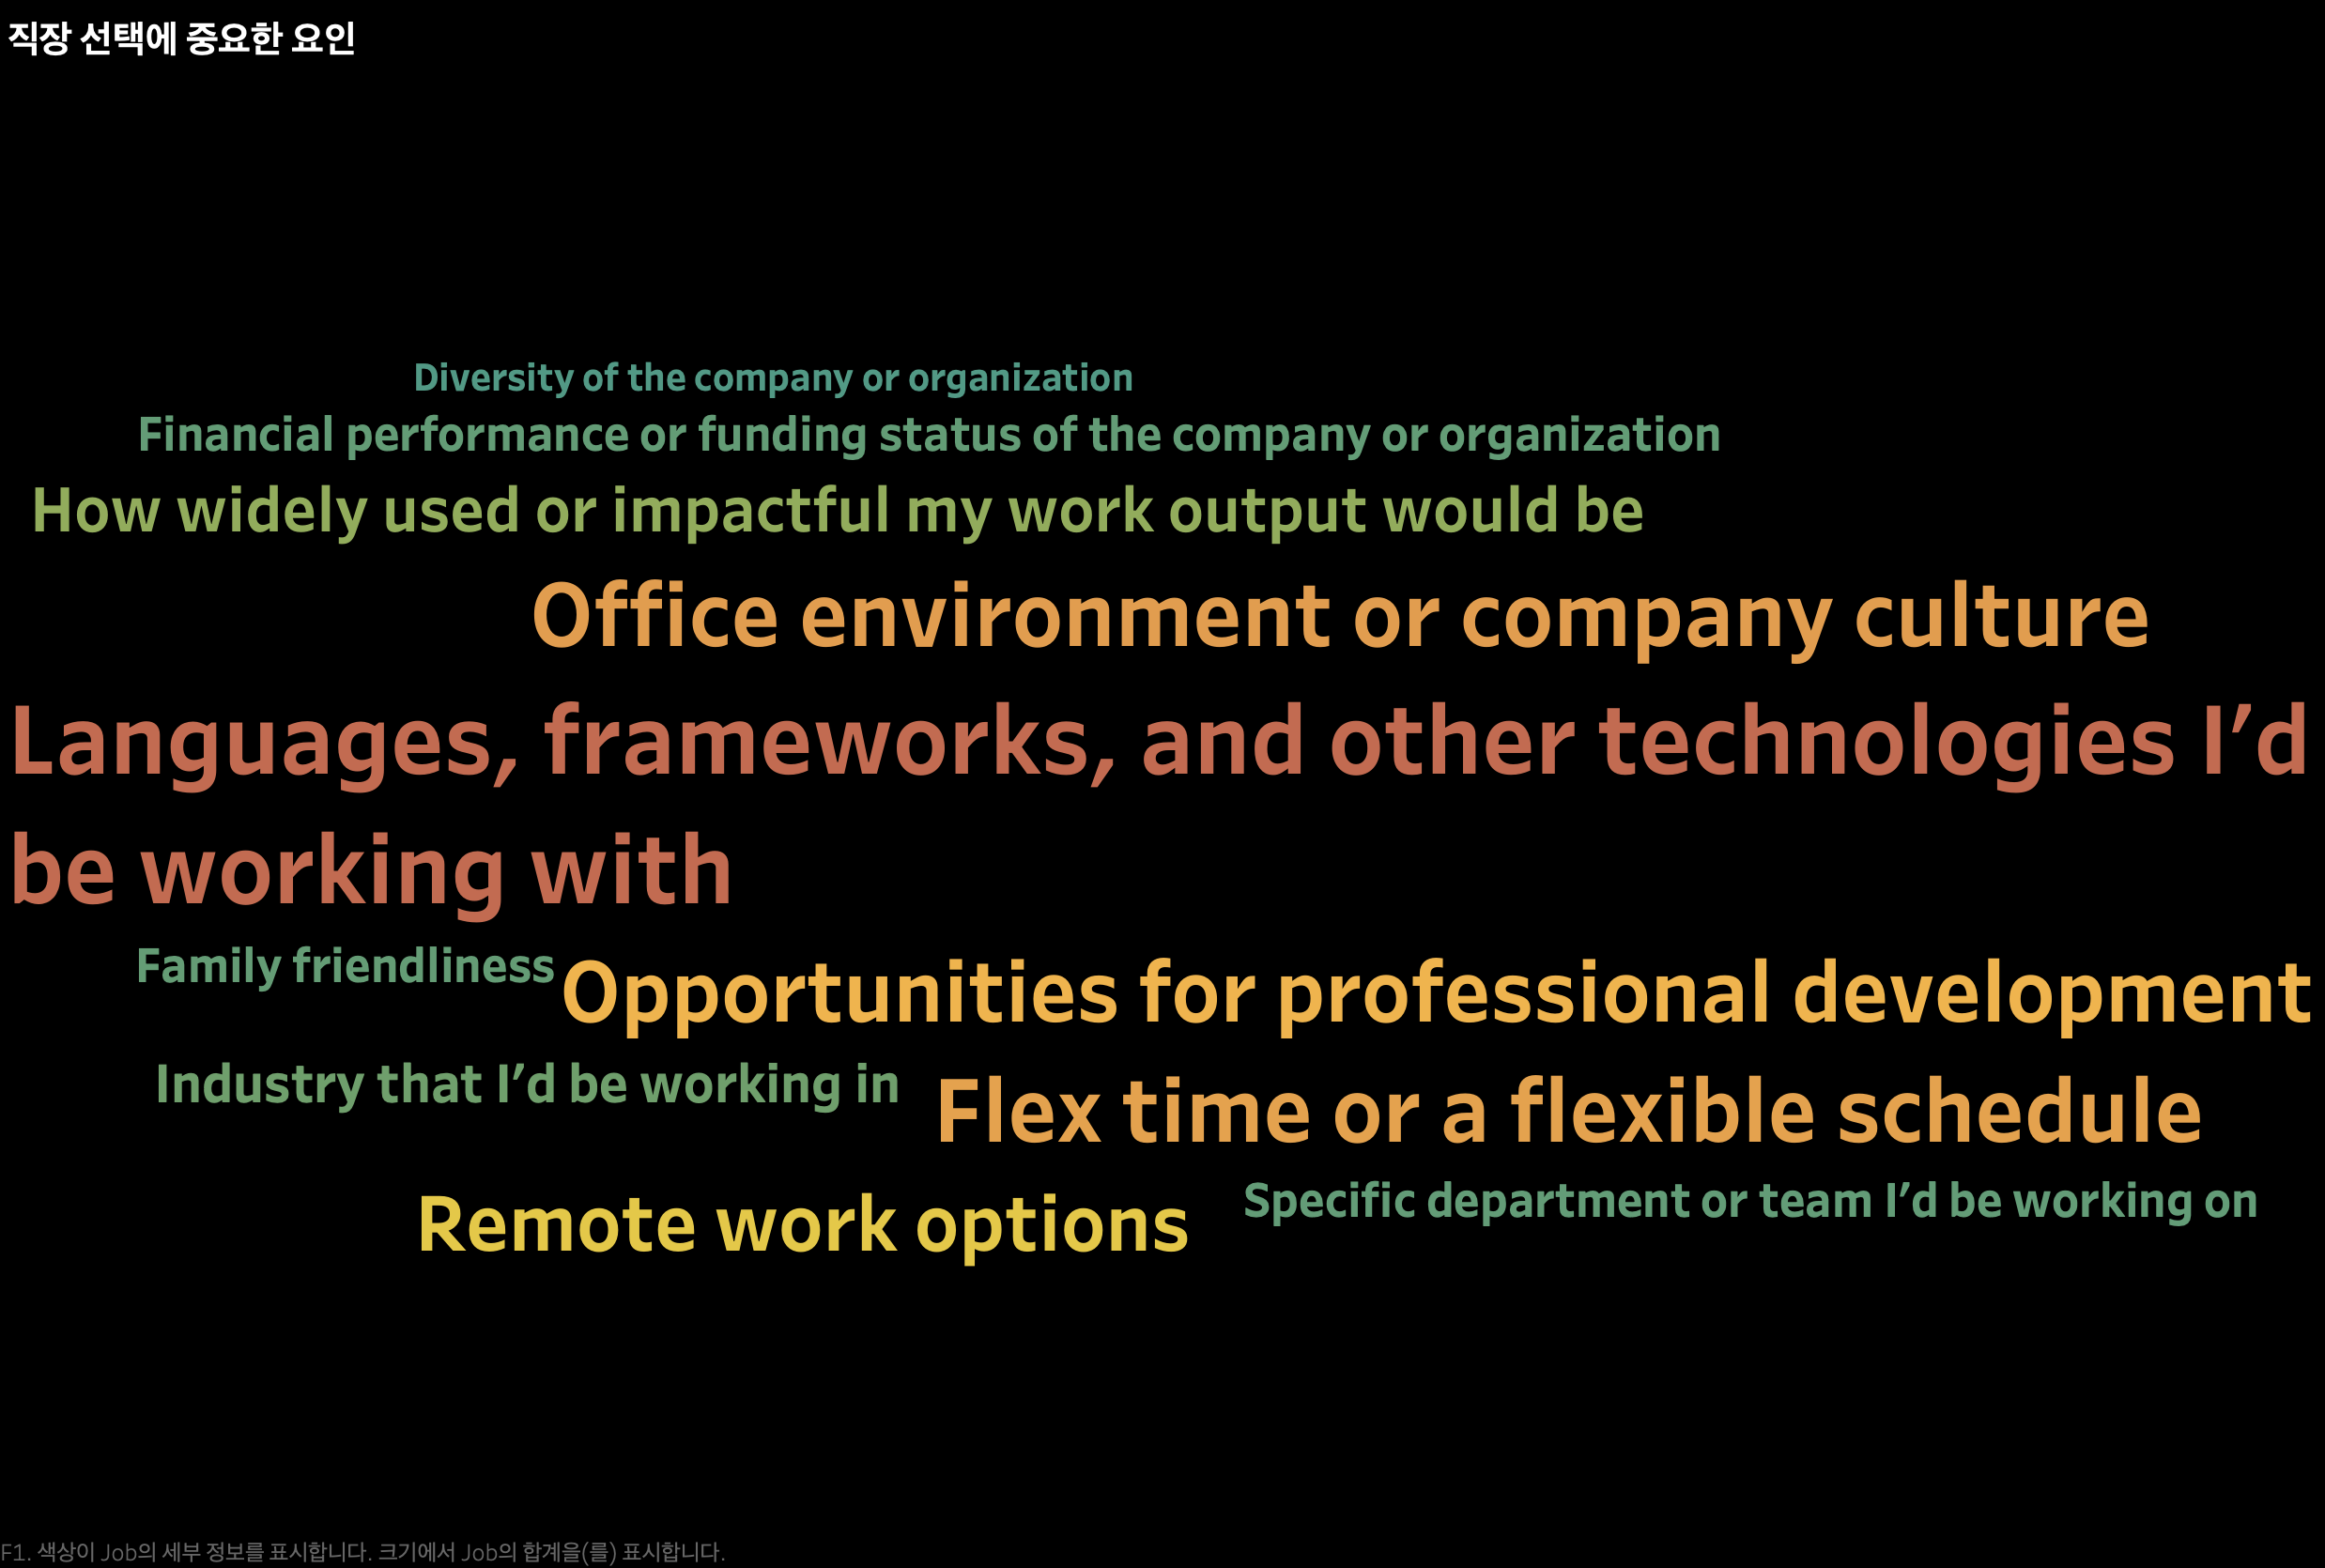

In [8]:
from IPython.display import Image
Image(filename = "importance_of_job.png")

**[워드클라우드 해석]**

개발자는 다음과 같은 기준으로 직장을 선택한다는 것을 알 수 있었다. 
- 현재 내가 사용하고 있는 언어와 기업에서 사용하는 언어의 일치
- 기업이 사용하는 기술 (프레임워크)
- 기업의 성장 가능성
- 기업 문화

⇒ 따라서 선택의 중요 요소인 언어, 기술을 기준으로 개발자의 특성을 시각화하였다

## 4.2 개발자가 가장 많이 사용하는 언어

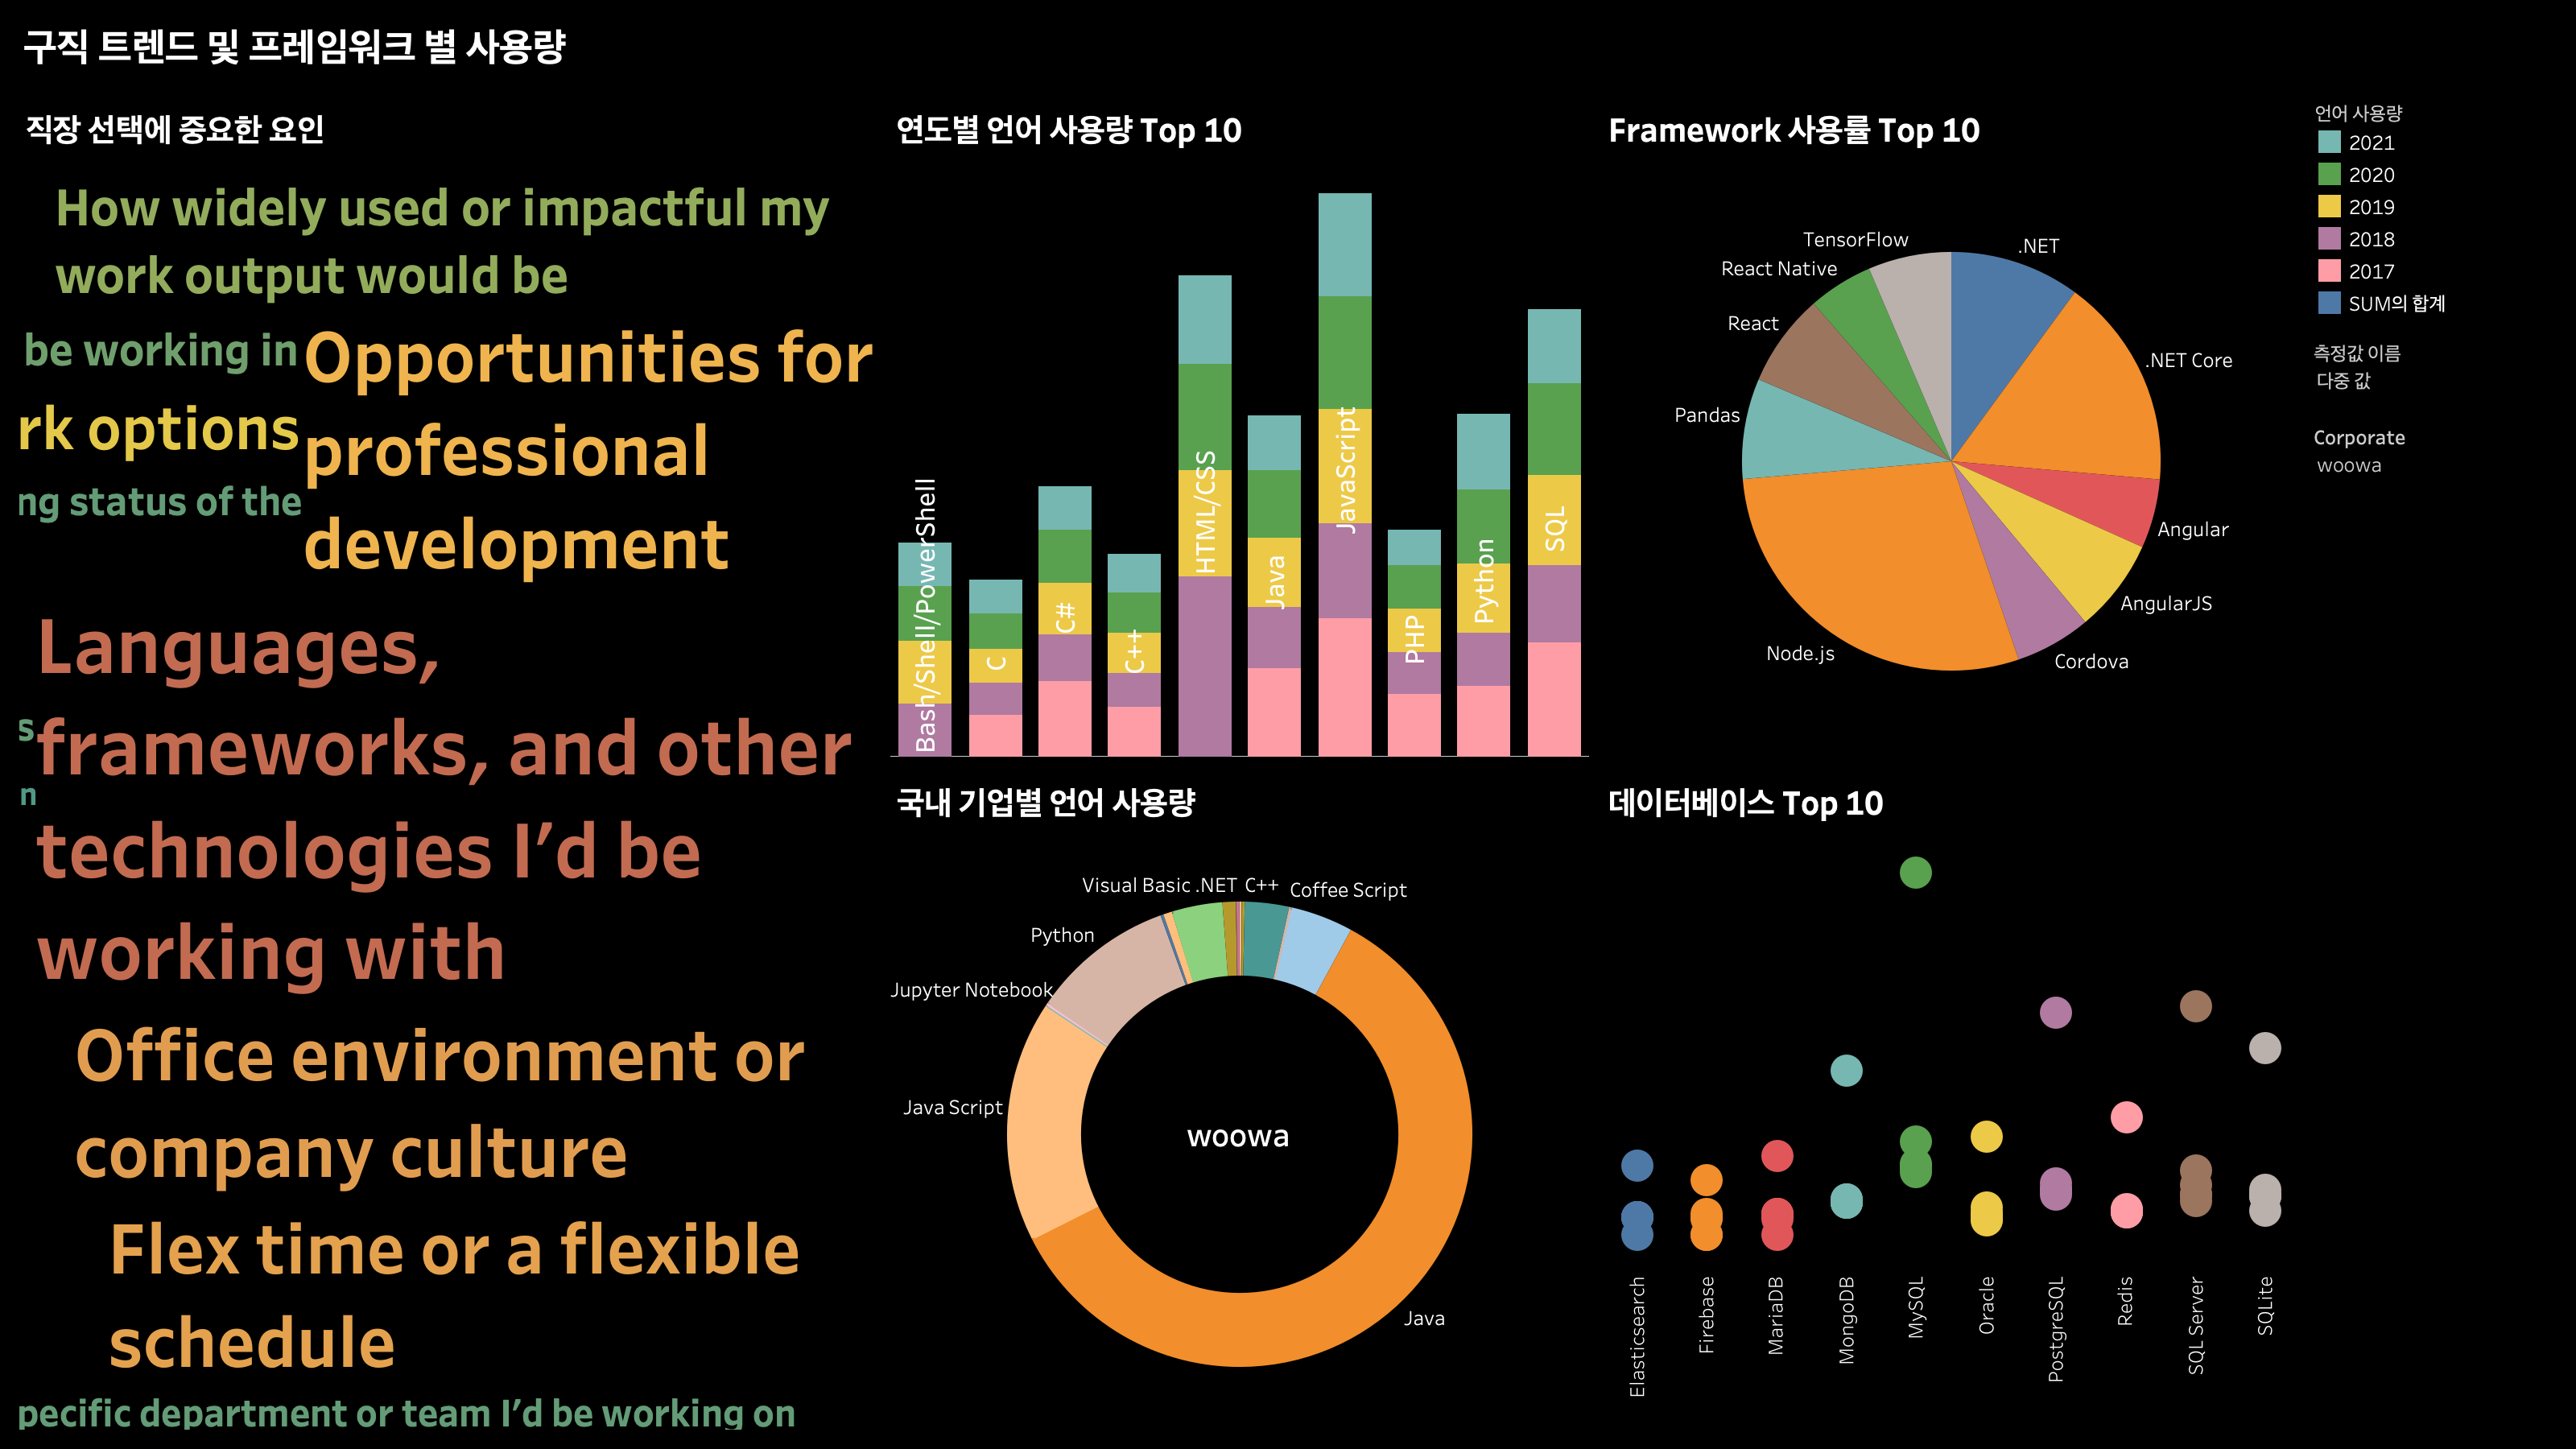

In [9]:
# 대시보드 첨부
Image(filename="dashboard1.png")

### 4.2 (부록) 선호 기업과의 일치
- 사용 데이터 
  - 사람인 
  - 로켓펀치 데이터 
- 수집 방법 
  - 사람인 : 공고 크롤링 (2021년 12월 20~21일 기준, 5000개 )
  - 로켓펀치 : ~~~ 

-

## 4.3 개발자가 가장 많이 사용하는 기술

In [ ]:
# 대시보드 첨부

# 5. 그렇다면 기업은 어떤 개발자를 원하는가? 

개발자가 직장을 선택하는 요건을 기준으로 시각화를 진행하였습니다. 

- 사용 데이터 
  - 사람인 
  - 로켓펀치 데이터 
- 수집 방법 
  - 사람인 : 공고 크롤링 (2021년 12월 20~21일 기준, 5000개 )
  - 로켓펀치 : ~~~ 

-

## 마무리하며

1. 분석의 한계점

- Github API 수집의 한계

    - 원래 초기 대시보드의 목표는 지원자의 깃헙과 기업의 깃헙의 언어 및 키워드를 가져와 비교 및 일치율을 나타내려고 하였다. 그러나 API를 사용하는 과정에서 요청량이 많아 Access Limit이 초과하는 경우가 존재하여 방향을 수정하


위 대시보드를 작성하는 저희는 학교를 졸업하거나 취업 준비를 하고 있는 학생으로서 IT 기업에 개발자로 취직하기 위해 필요한 것이 무엇인지 고민을 많이 해보았습니다. 대체로 코딩테스트, CS 면접 기본적인 것에 대하여 준비를 해야하는 것을 알고 있었지만 직무별 요구되는 개발 프레임워크나 언어 등 자세한 방향을 찾기에는 어려움이 있었습니다. 저와 같은 고민을 하고 있는 분들이 개발자가 회사를 선택하는 과정에서 본인의 기준을 잘 잡을 수 있도록 도움이 되었으면 합니다. 

여러분들이 이번 대시보드를 보면서 최신 떠오르는 기술 트렌드나 기업에서 요구하는 언어 및 프레임워크에 대하여 빠르게 파악할 수 있다고 자부할 수 있습니다. 또한, 개발자는 지속적인 성장이 필요한 직무인만큼 기술의 속도를 따라가며 개인의 경쟁력을 확보할 수 있을 것이라고 생각합니다. 같은 사회초년생이자 취준생으로서 모두 화이팅하시길 바랍니다!

### 부록) 데이터 전처리 과정